In [2]:
from ipywidgets import interact
import fabio
from skimage.measure import compare_ssim as ssim
import cv2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
d = '/Users/ezatterin/Documents/UCL_phd/data/ESRF/HC_2615/detector/align2/'

In [4]:
scan8 = [fabio.open(d+'data_mpx4_00527.edf.gz')]
for n in range(34):
    scan8.append(scan8[n].next())

Plot images with selected region of interest; remove 0 intensity pixels for log scale:

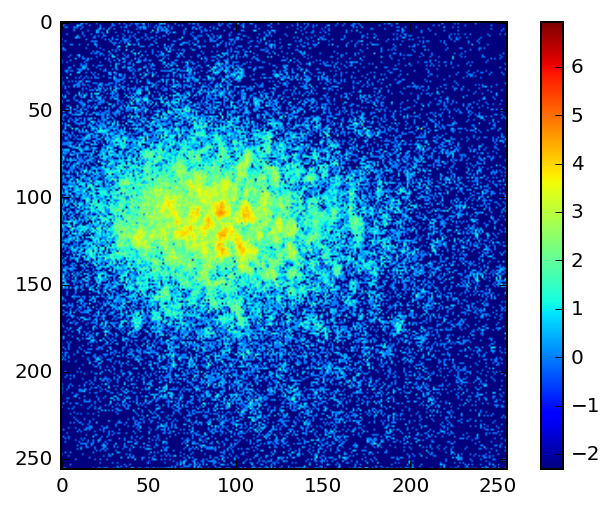

In [5]:
@interact(i=(0,len(scan8)))
def plt_scans(i):
    img = scan8[i].data[0:256,0:256]
    img=img.astype('float')
    img[img==0.] = 0.1
    plt.imshow(np.log(img))
    plt.colorbar()

See what the SSI of subsequent images is:

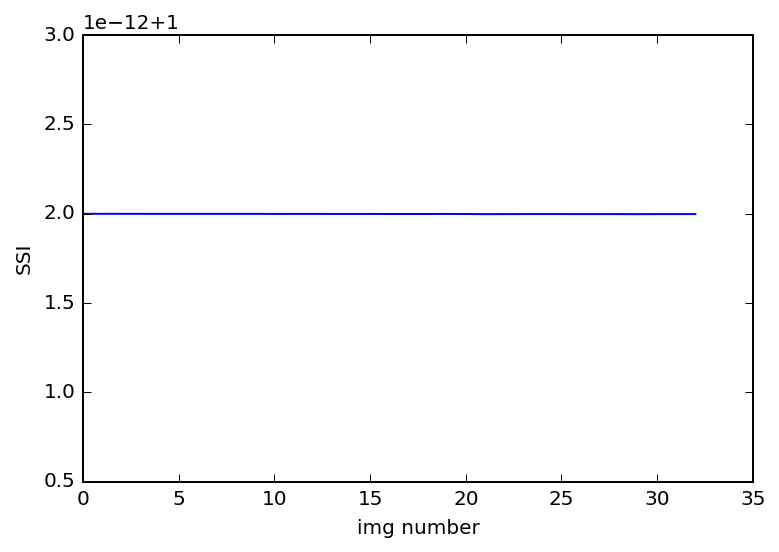

In [6]:
ssi = []
for n in range(1,34):
    s = ssim(scan8[0].data[0:256,0:256], scan8[n].data[0:256,0:256])
    ssi.append(s)

plt.plot(ssi)
# plt.yscale('log')
plt.ylabel('SSI')
plt.xlabel('img number');

$$
\dfrac{\sum_{x,y} \sum_i x_0 \cdot x_i}{\sum_{x,y} x_0^2}
$$

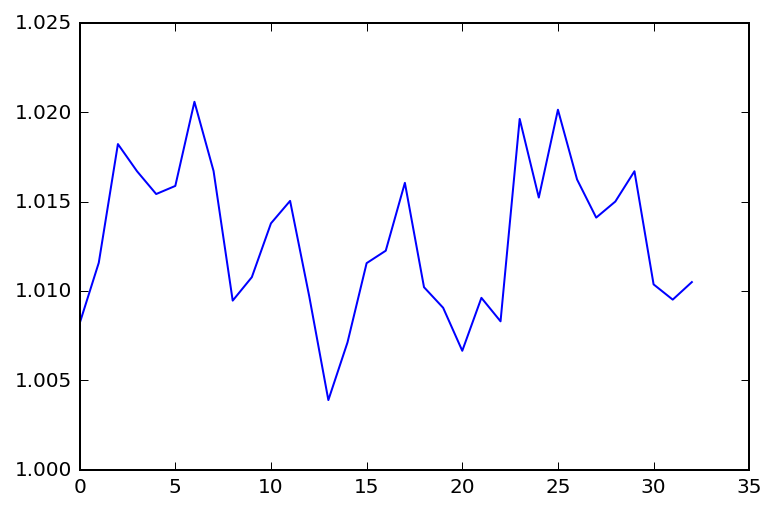

In [7]:
ls = []
for index in range(1,34):
    im = scan8[0].data * scan8[index].data
    im = im.sum().sum()
    ls.append(im)
ls = np.array(ls)
norm = ls.astype('float')/((scan8[0].data**2).sum().sum())
plt.plot(norm)